In [1]:
import numpy as np
import matplotlib.pyplot as plt

# model

An event has the following property:  
initially the probability of success is $p$, then each time we fail the success of probability of next trial increment by $p$, until we success. Upon we succeed, the probability fall to its initial value, say , $p$  
**target:** what is the average probability of success for each trial?

# simulation

first we use monte-carlo simulation to get the approximate value.

In [2]:
ps = np.linspace(0.00,1.0,101)
simulation = 1000000
success = []
for p in ps:
    cur_p = p
    cur_suc = 0
    for i in range(simulation):
        if np.random.rand()<cur_p:
            cur_p = p
            cur_suc += 1
        else:
            cur_p += p
    success.append(cur_suc)
    print('p = %.6f, result = %.6f'%(p,cur_suc/simulation))

p = 0.000000, result = 0.000000
p = 0.010000, result = 0.081710
p = 0.020000, result = 0.116958
p = 0.030000, result = 0.144804
p = 0.040000, result = 0.167763
p = 0.050000, result = 0.188965
p = 0.060000, result = 0.208331
p = 0.070000, result = 0.225517
p = 0.080000, result = 0.242438
p = 0.090000, result = 0.258229
p = 0.100000, result = 0.273743
p = 0.110000, result = 0.287825
p = 0.120000, result = 0.301491
p = 0.130000, result = 0.315074
p = 0.140000, result = 0.327704
p = 0.150000, result = 0.340895
p = 0.160000, result = 0.352812
p = 0.170000, result = 0.364343
p = 0.180000, result = 0.375782
p = 0.190000, result = 0.387190
p = 0.200000, result = 0.398465
p = 0.210000, result = 0.409013
p = 0.220000, result = 0.419336
p = 0.230000, result = 0.430360
p = 0.240000, result = 0.440515
p = 0.250000, result = 0.450510
p = 0.260000, result = 0.459716
p = 0.270000, result = 0.469283
p = 0.280000, result = 0.478458
p = 0.290000, result = 0.488964
p = 0.300000, result = 0.498009
p = 0.31

In [3]:
results = np.array(success,dtype=np.float32)/simulation
print(results)

[0.       0.08171  0.116958 0.144804 0.167763 0.188965 0.208331 0.225517
 0.242438 0.258229 0.273743 0.287825 0.301491 0.315074 0.327704 0.340895
 0.352812 0.364343 0.375782 0.38719  0.398465 0.409013 0.419336 0.43036
 0.440515 0.45051  0.459716 0.469283 0.478458 0.488964 0.498009 0.507553
 0.517142 0.526539 0.534821 0.542374 0.549281 0.557576 0.565018 0.573221
 0.581258 0.588988 0.598195 0.606466 0.614658 0.622907 0.631354 0.639935
 0.648728 0.658094 0.666698 0.671571 0.675261 0.680625 0.684852 0.689509
 0.694946 0.699311 0.704006 0.709442 0.714825 0.719639 0.724621 0.729571
 0.735023 0.740965 0.746708 0.751448 0.757788 0.76305  0.769535 0.77522
 0.780853 0.787577 0.79349  0.79994  0.806418 0.812932 0.819221 0.826366
 0.833053 0.839931 0.847007 0.854798 0.86168  0.868969 0.877673 0.884953
 0.893149 0.900571 0.909174 0.917568 0.925976 0.934271 0.943465 0.952253
 0.961682 0.971    0.980423 0.990175 1.      ]


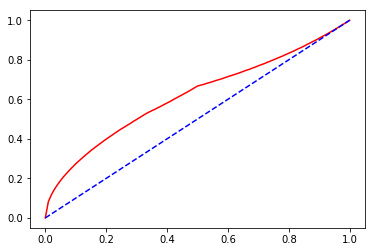

In [4]:
plt.plot(ps,results,'r-')
plt.plot([0,1],[0,1],'b--')
plt.show()

# inference

it would be easier to solve this problem from another angle:
let X be the number of trial to succeed for the first time, then its probability mass function is:  
$$ p(X=n) = \left(\prod_{i=1}^{i=n-1}\left(1-ip\right)\right)np ,n\le \lceil\frac{1}{p}\rceil$$  
assume that $\mathbf{E}[X] = N$ then the probability of success should be $\frac{1}{N}$

# calculation proof

In [5]:
ex = [0]
for p in ps:
    if p==0:
        continue
    num = int(np.ceil(1/p))
    print(num)
    e = 0
    for n in range(1,num+1):
        pro = 1
        for j in range(1,n):
            pro *= (1-j*p)
        if n*p < 1:
            pro *= n*p
        e_ = pro * n
        e+=e_
    ex.append(e)
print(ex)
    

100
50
34
25
20
17
15
13
12
10
10
9
8
8
7
7
6
6
6
5
5
5
5
5
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
[0, 12.20996063021597, 8.54312703934395, 6.919905032082994, 5.95297910624526, 5.293584586000901, 4.8071771373083765, 4.429398432836956, 4.125083359955473, 3.8731802310725976, 3.6602156799999994, 3.477114143620187, 3.317515996004352, 3.1768204584352, 3.0514984433664, 2.9391475000000002, 2.8373937971200003, 2.745001296, 2.6605616640000003, 2.582564392, 2.5103999999999997, 2.44485944, 2.38313344, 2.32500984, 2.27028224, 2.21875, 2.1733439999999997, 2.129602, 2.087488, 2.0469660000000003, 2.0079999999999996, 1.9705540000000001, 1.9345919999999999, 1.9000779999999997, 1.8712, 1.8449999999999998, 1.8192000000000002, 1.7938, 1.7688, 1.7442000000000002, 1.7199999999999998, 1.6962000000000002, 1.6728, 1.6498000000000002, 1.6272000000000002, 1.6050000000000002, 1.5832000000000002, 1.5618

f:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


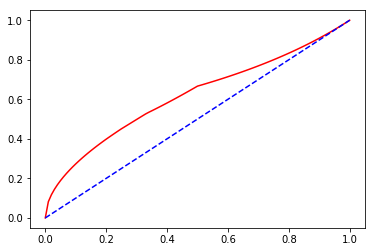

In [12]:
result_inf = np.zeros((len(ex)))
result_inf[1:] =1/np.array(ex[1:],dtype=np.float32)
result_inf[0] = 0
plt.plot(ps,result_inf,'r-')
plt.plot([0,1],[0,1],'b--')
plt.show()

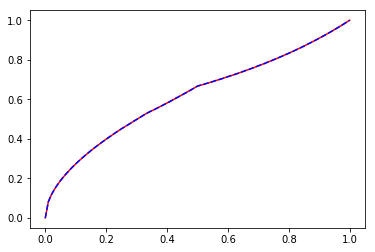

In [13]:
plt.plot(ps,result_inf,'r-')
plt.plot(ps,results,'b--')
plt.show()

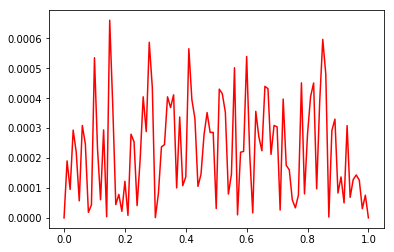

In [24]:
dif = np.abs(results - result_inf)
plt.plot(ps,dif,'r-')
plt.show()

In [27]:
print(np.max(dif[results!=0]/results[results!=0]))

0.0023294982121165523


We can see the inference result strongly corresponds to our simulation, which proves that our idea is right

# Reverse

for we can not get the precise formula for problem, I think once we get the approximate graph, we can use approximate method like linear interpolation to get the solution for the reverse problem.

In [16]:
def interpolation(x1,y1,x2,y2,x):
    return y1 + (x-x1)*(y2-y1)/(x2-x1)

def binary_search(arr,start,end,value):
    mid = int((start+end)/2)
    if arr[mid]<=value and arr[mid+1]>value:
        return mid
    elif arr[mid] > value:
        return binary_search(arr,start,mid,value)
    else:
        return binary_search(arr,mid+1,end,value)

In [17]:
arr = [1,2,3,4,5,6]
print(binary_search(arr,0,5,1))
print(binary_search(arr,0,5,1.5))
print(binary_search(arr,0,5,5.5))

0
0
4


In [19]:
def find_p(xs,ys,prob):
    if prob<=0: 
        return 0
    if prob>=1:
        return 1
    idx = binary_search(xs,0,len(xs)-1,prob)
    return interpolation(xs[idx],ys[idx],xs[idx+1],ys[idx+1],prob)

In [20]:
even = result_inf[ np.arange(101)%2==0] 
odd = result_inf[ np.arange(101)%2!=0]
even_p = ps[np.arange(101)%2==0]
odd_p = ps[ np.arange(101)%2!=0]
cal = []
for prob in odd:
    cal.append(find_p(even,even_p,prob))
print(cal)

[0.013993700689769569, 0.03078245500133637, 0.05045215751191671, 0.07031600115407309, 0.0902417299473911, 0.11019535663674014, 0.13016062794946737, 0.15013163127815635, 0.17012828358522278, 0.190098159688116, 0.2100396892665261, 0.23005846666457108, 0.2504143767510933, 0.2699881100677018, 0.29000165015723645, 0.31001597607846415, 0.33072356328881264, 0.34993600849058076, 0.36993888423776544, 0.38994206851447916, 0.40994560853404644, 0.42994954813918734, 0.44995382956373653, 0.46995860924313554, 0.489963838458188, 0.509932780225742, 0.5299319324862996, 0.5499309523809525, 0.5699301023175317, 0.5899290813757146, 0.6099280848932214, 0.6299270072992701, 0.6499259186843506, 0.6699248294693784, 0.6899237492264971, 0.7099224890775556, 0.7299212212390231, 0.7499200044700646, 0.7699187116495269, 0.78991732003473, 0.8099158954622374, 0.8299144971403862, 0.8499130599279572, 0.869911530017009, 0.8899099343875869, 0.9099082653259927, 0.9299064495878596, 0.9499047888138356, 0.9699029439287792, 0.989

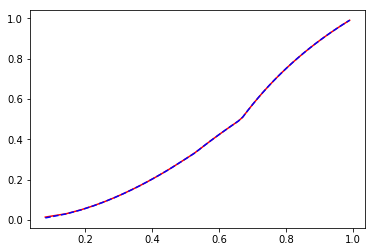

In [21]:
plt.plot(odd,cal,'r-')
plt.plot(odd,odd_p,'b--')
plt.show()

In [30]:
cal = np.array(cal)
diff = np.abs(cal-odd_p)
relativ_diff = diff/odd_p

print(diff)
print(np.max(diff))
print(np.max(relativ_diff))

[3.99370069e-03 7.82455001e-04 4.52157512e-04 3.16001154e-04
 2.41729947e-04 1.95356637e-04 1.60627949e-04 1.31631278e-04
 1.28283585e-04 9.81596881e-05 3.96892665e-05 5.84666646e-05
 4.14376751e-04 1.18899323e-05 1.65015724e-06 1.59760785e-05
 7.23563289e-04 6.39915094e-05 6.11157622e-05 5.79314855e-05
 5.43914660e-05 5.04518608e-05 4.61704363e-05 4.13907569e-05
 3.61615418e-05 6.72197743e-05 6.80675137e-05 6.90476190e-05
 6.98976825e-05 7.09186243e-05 7.19151068e-05 7.29927007e-05
 7.40813156e-05 7.51705306e-05 7.62507735e-05 7.75109224e-05
 7.87787610e-05 7.99955299e-05 8.12883505e-05 8.26799653e-05
 8.41045378e-05 8.55028596e-05 8.69400720e-05 8.84699830e-05
 9.00656124e-05 9.17346740e-05 9.35504121e-05 9.52111862e-05
 9.70560712e-05 9.90074932e-05]
0.003993700689769569
0.39937006897695687
